# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis


import pandas as pd              
import numpy as np               

import matplotlib.pyplot as plt  
import seaborn as sns          

from sklearn.model_selection import train_test_split

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [15]:
# Importing the file porter_data_1.csv
data = pd.read_csv(r'C:\Users\Prashant\Downloads\Delivery_Starter\porter_data_1.csv')

data.head()
#data.info()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [16]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
data['created_at'] = pd.to_datetime(data['created_at'], errors='coerce') 
data['actual_delivery_time'] = pd.to_datetime(data['actual_delivery_time'], errors='coerce')


print(data[['created_at', 'actual_delivery_time']].head())

           created_at actual_delivery_time
0 2015-02-06 22:24:17  2015-02-06 23:11:17
1 2015-02-10 21:49:25  2015-02-10 22:33:25
2 2015-02-16 00:11:35  2015-02-16 01:06:35
3 2015-02-12 03:36:46  2015-02-12 04:35:46
4 2015-01-27 02:12:36  2015-01-27 02:58:36


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [17]:
# Convert categorical features to category type
data['store_primary_category'] = data['store_primary_category'].astype('category')
data['order_protocol'] = data['order_protocol'].astype('category')

print(data.dtypes)

market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [18]:
# Calculate time taken in minutes
data['delivery_time'] = (data['actual_delivery_time'] - data['created_at']).dt.total_seconds() / 60

# Verify by checking the first few rows
print(data[['created_at', 'actual_delivery_time', 'delivery_time']].head())

           created_at actual_delivery_time  delivery_time
0 2015-02-06 22:24:17  2015-02-06 23:11:17           47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25           44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35           55.0
3 2015-02-12 03:36:46  2015-02-12 04:35:46           59.0
4 2015-01-27 02:12:36  2015-01-27 02:58:36           46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [19]:
# Extract the hour and day of week from the 'created_at' timestamp
data['order_hour'] = data['created_at'].dt.hour

# Extract the day of the week (0 = Monday, 6 = Sunday)
data['order_day_of_week'] = data['created_at'].dt.dayofweek

# Create a categorical feature 'isWeekend'
data['isWeekend'] = data['order_day_of_week'] >= 5  # This will give True (1) for weekends and False (0) for weekdays

print(data[['order_hour', 'order_day_of_week', 'isWeekend']].head())

   order_hour  order_day_of_week  isWeekend
0          22                  4      False
1          21                  1      False
2           0                  0      False
3           3                  3      False
4           2                  1      False


In [20]:
# Drop unnecessary columns

data = data.drop(columns=['created_at'])

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [22]:
# Define target variable (y) and features (X)
y = data['delivery_time']

X = data.drop(columns=['delivery_time', 'order_day_of_week'])

print(X.shape, y.shape)

(175777, 15) (175777,)


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140621, 15) (35156, 15) (140621,) (35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [25]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_cols = X_train.select_dtypes(include=['number']).columns.tolist()

categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns: ", numerical_cols)
print("Categorical Columns: ", categorical_cols)

Numerical Columns:  ['market_id', 'total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'order_hour']
Categorical Columns:  ['store_primary_category', 'order_protocol']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

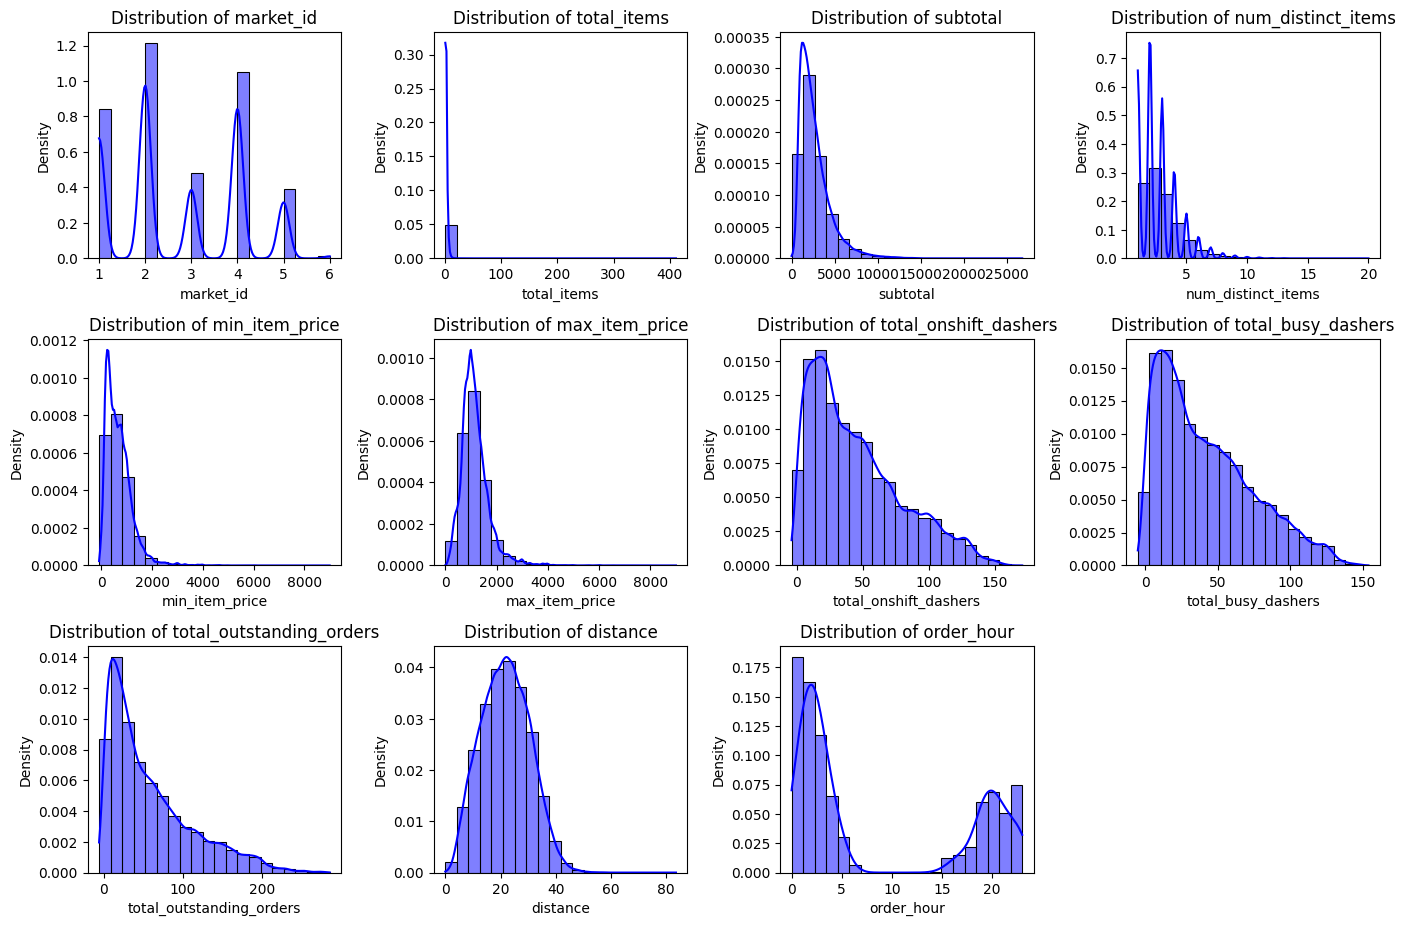

In [28]:
# Plot distributions for all numerical columns

plt.figure(figsize=(14, 12))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(X_train[col], kde=True, bins=20, color='blue', stat='density') 
    plt.title(f'Distribution of {col}')  
    plt.xlabel(col) 
    plt.ylabel('Density') 


plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

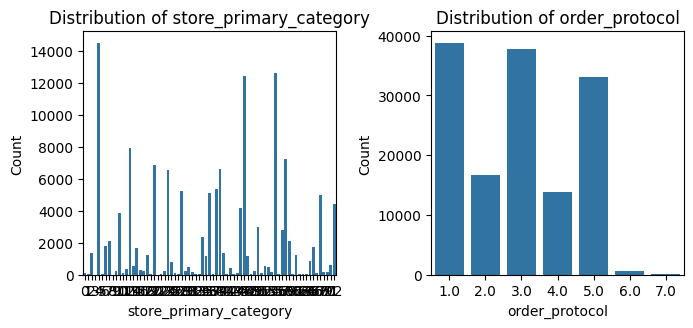

In [32]:
# Distribution of categorical columns

plt.figure(figsize=(14, 12))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i) 
    sns.countplot(data=X_train, x=col)  
    plt.title(f'Distribution of {col}')  
    plt.xlabel(col) 
    plt.ylabel('Count') 

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

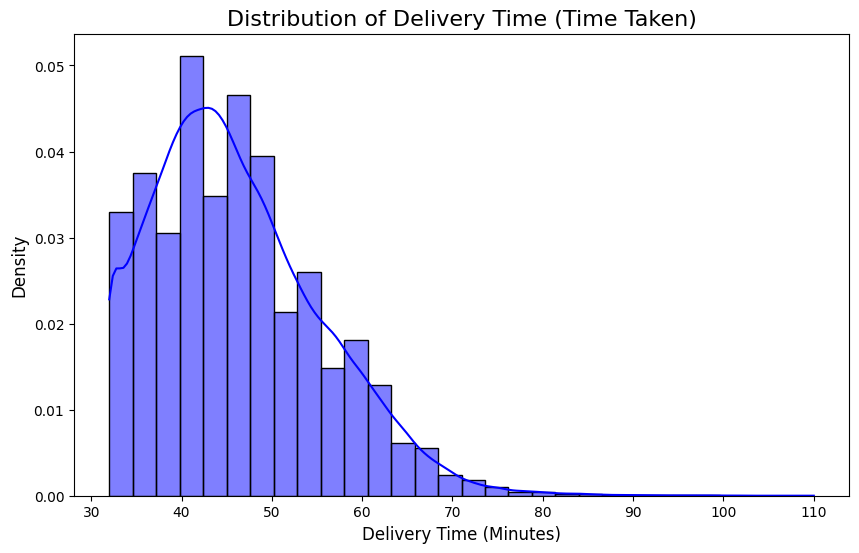

In [33]:
# Distribution of time_taken

plt.figure(figsize=(10, 6))

sns.histplot(y_train, kde=True, bins=30, color='blue', stat='density')

plt.title('Distribution of Delivery Time (Time Taken)', fontsize=16)
plt.xlabel('Delivery Time (Minutes)', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

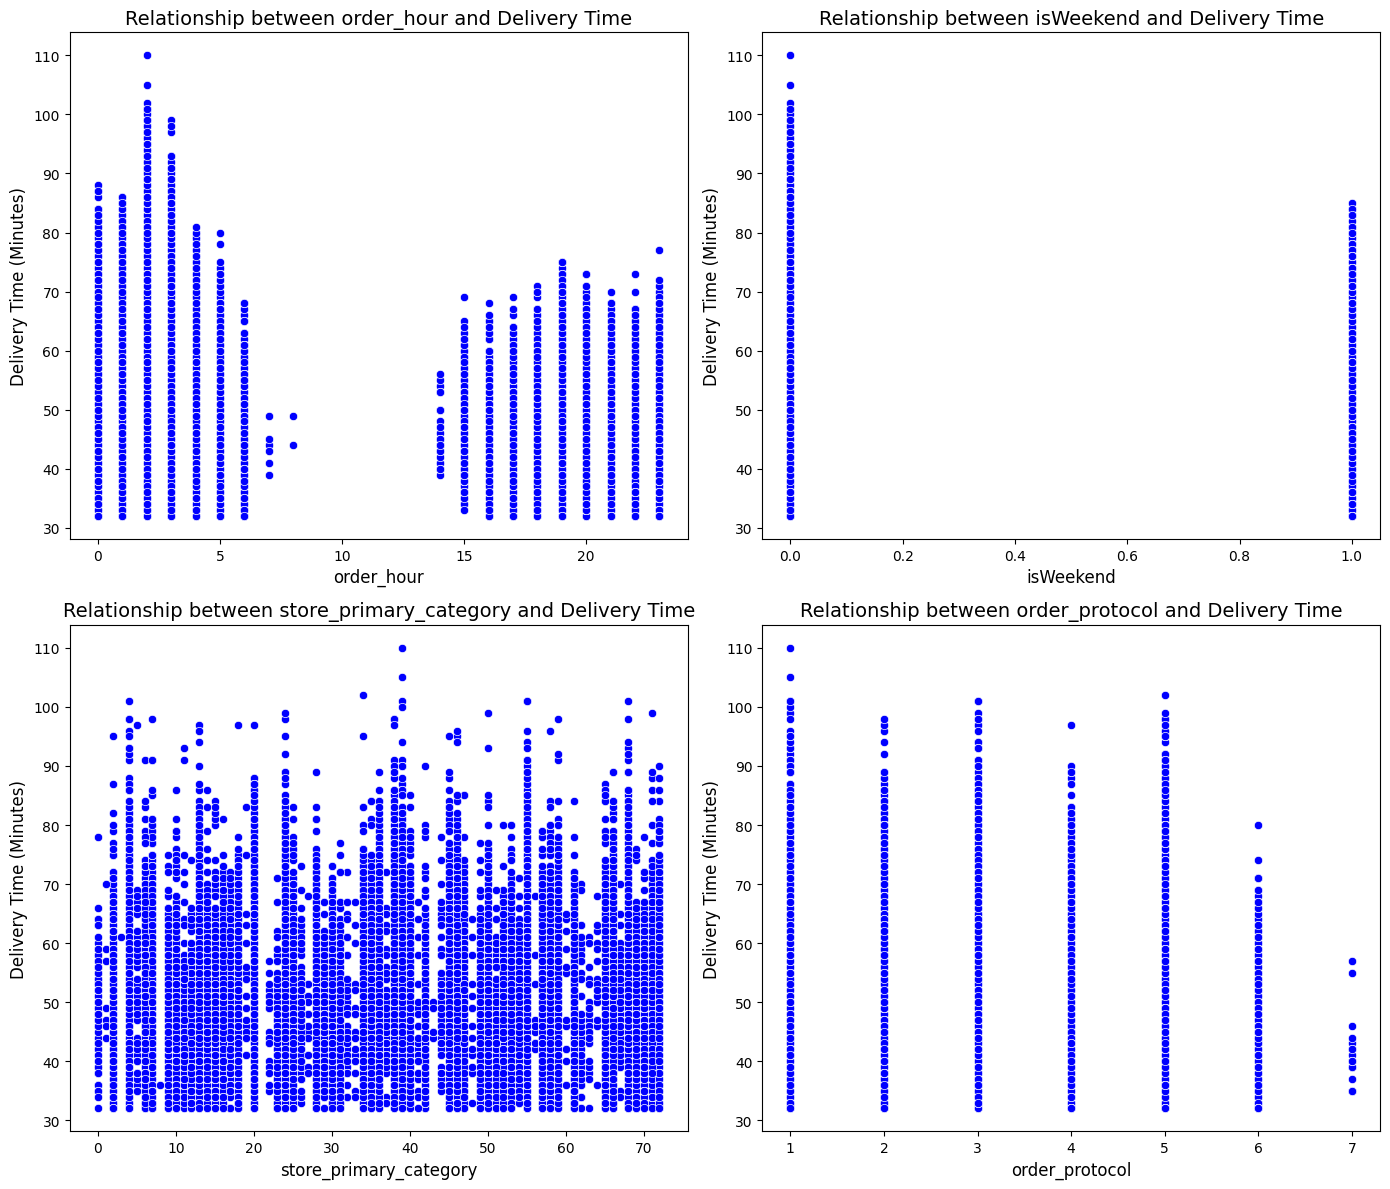

In [34]:
# Scatter plot to visualise the relationship between time_taken and other features

features_to_plot = ['order_hour', 'isWeekend', 'store_primary_category', 'order_protocol']

plt.figure(figsize=(14, 12))

for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i) 
    sns.scatterplot(x=X_train[feature], y=y_train, color='blue') 
    plt.title(f'Relationship between {feature} and Delivery Time', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Delivery Time (Minutes)', fontsize=12)

plt.tight_layout()
plt.show()

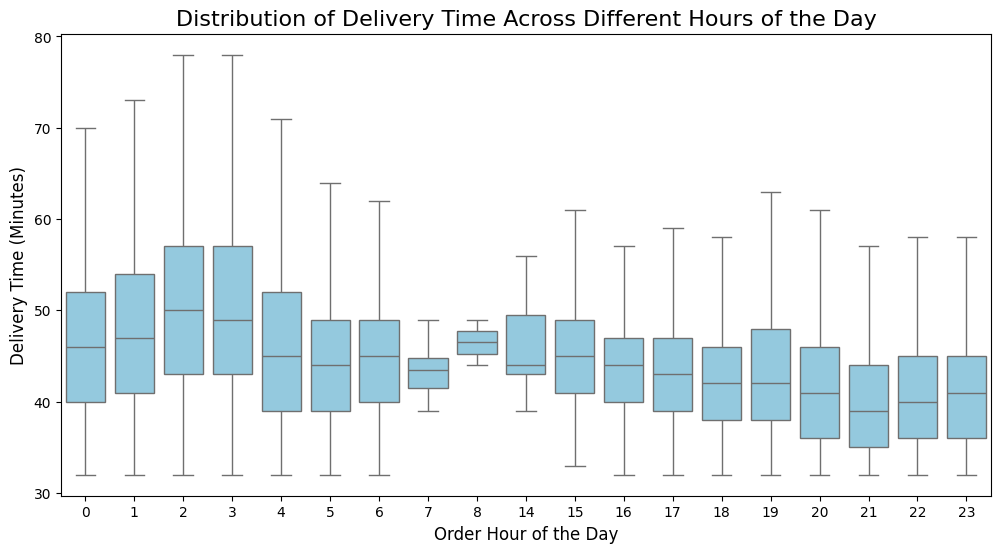

In [35]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 6))

sns.boxplot(x=X_train['order_hour'], y=y_train, color='skyblue', showfliers=False)

plt.title('Distribution of Delivery Time Across Different Hours of the Day', fontsize=16)
plt.xlabel('Order Hour of the Day', fontsize=12)
plt.ylabel('Delivery Time (Minutes)', fontsize=12)

plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

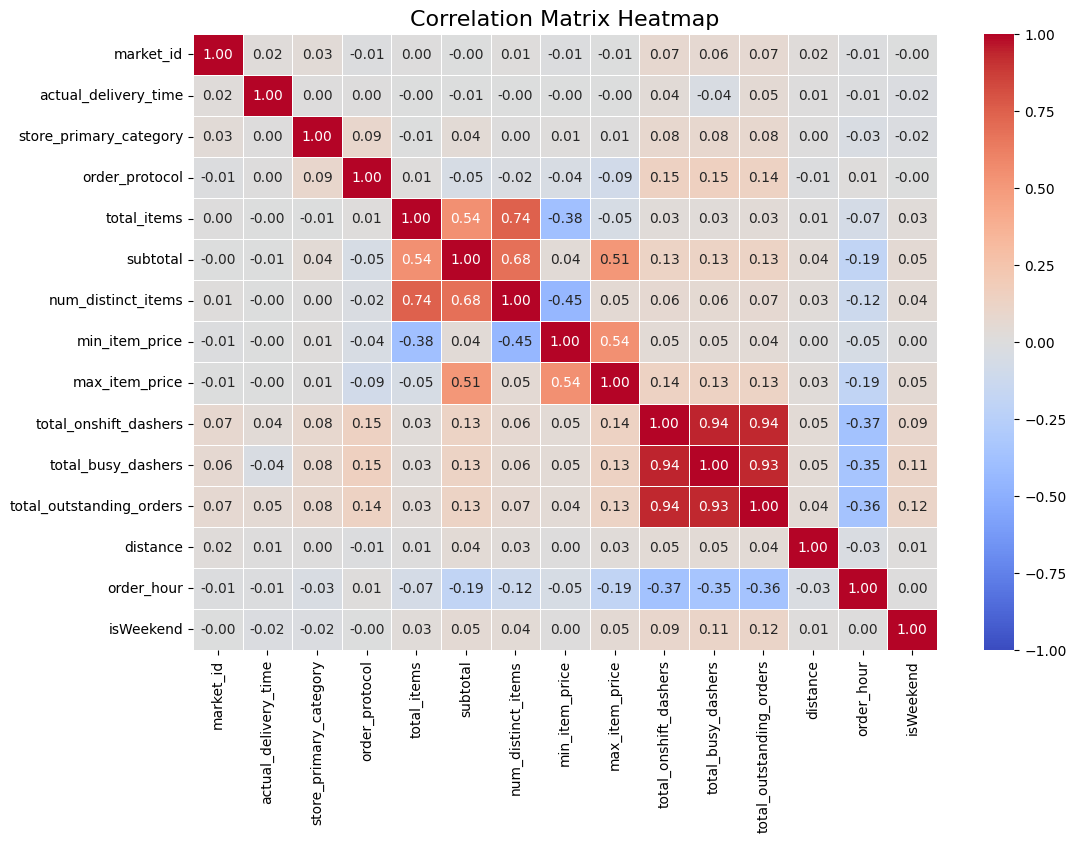

In [36]:
# Plot the heatmap of the correlation matrix

correlation_matrix = X_train.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap', fontsize=16)

plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [38]:
# Drop 3-5 weakly correlated columns from training dataset

correlation_with_target = X_train.corrwith(y_train)

weakly_correlated_cols = correlation_with_target[abs(correlation_with_target) < 0.1].index

X_train_reduced = X_train.drop(columns=weakly_correlated_cols)

print("Dropped columns:", weakly_correlated_cols)
print("New shape of X_train:", X_train_reduced.shape)

Dropped columns: Index(['market_id', 'actual_delivery_time', 'store_primary_category',
       'min_item_price'],
      dtype='object')
New shape of X_train: (140621, 11)


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

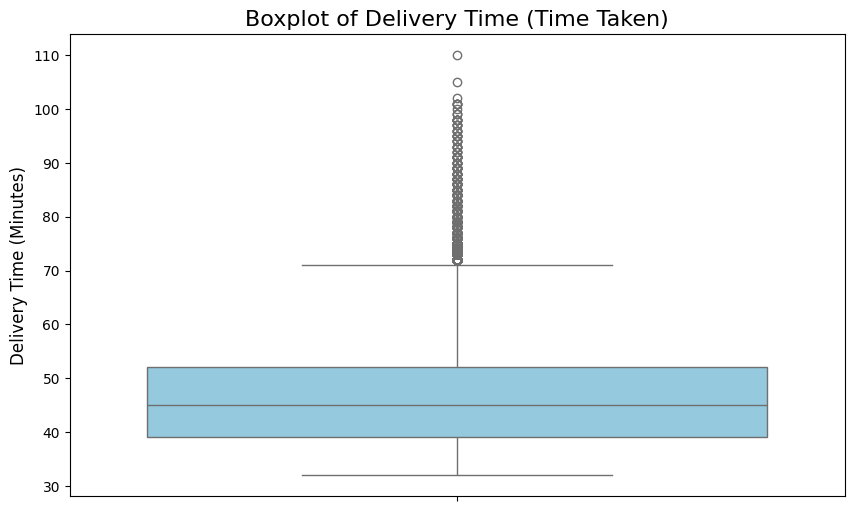

In [39]:
# Boxplot for time_taken

plt.figure(figsize=(10, 6))

sns.boxplot(y=y_train, color='skyblue')

plt.title('Boxplot of Delivery Time (Time Taken)', fontsize=16)
plt.ylabel('Delivery Time (Minutes)', fontsize=12)

plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [41]:
# Handle outliers

numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numerical columns
Q1 = X_train[numerical_cols].quantile(0.25)
Q3 = X_train[numerical_cols].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_train_no_outliers = X_train[~((X_train[numerical_cols] < lower_bound) | (X_train[numerical_cols] > upper_bound)).any(axis=1)]

print(f"Original data shape: {X_train.shape}")
print(f"Data shape after removing outliers: {X_train_no_outliers.shape}")

Original data shape: (140621, 15)
Data shape after removing outliers: (111745, 15)


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [42]:
# Import libraries

from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor   
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder    
from sklearn.preprocessing import OneHotEncoder 

import statsmodels.api as sm 

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [43]:
# Apply scaling to the numerical columns

numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

X_train_scaled = X_train.copy() 
X_test_scaled = X_test.copy()  

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(X_train_scaled[numerical_cols].head())

        market_id  total_items  subtotal  num_distinct_items  min_item_price  \
102712  -0.559594    -0.809858 -1.026257           -1.031025        0.116889   
94576    0.943226    -0.809858 -0.930670           -1.031025        0.598926   
49784   -1.311004     0.290202 -0.359882            0.813974       -1.030360   
37753    0.191816    -0.443171 -0.176356           -0.416025       -0.203184   
91728   -0.559594    -0.809858 -0.693069           -1.031025        1.225575   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
102712       -0.741388              -0.287165           -0.089448   
94576        -0.294713               1.882200            0.935472   
49784        -0.473383              -1.125986           -1.207543   
37753         0.427112              -0.836737           -0.772728   
91728         0.285963               0.551657            0.159017   

        total_outstanding_orders  distance  
102712                 -0.042543  0.968899  
94576         

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [55]:
# Function to convert datetime columns into individual features (like year, month, etc.)
def extract_datetime_features(df):
    for col in df.select_dtypes(include=['datetime']):
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df[col + '_year'] = df[col].dt.year
        df[col + '_month'] = df[col].dt.month
        df[col + '_day'] = df[col].dt.day
        df[col + '_hour'] = df[col].dt.hour
        df[col + '_minute'] = df[col].dt.minute
        df[col + '_second'] = df[col].dt.second
        df = df.drop(columns=[col])  
    return df

X_train_scaled = extract_datetime_features(X_train_scaled)
X_test_scaled = extract_datetime_features(X_test_scaled)

print(X_train_scaled.dtypes)

market_id                       float64
store_primary_category         category
order_protocol                 category
total_items                     float64
subtotal                        float64
num_distinct_items              float64
min_item_price                  float64
max_item_price                  float64
total_onshift_dashers           float64
total_busy_dashers              float64
total_outstanding_orders        float64
distance                        float64
order_hour                        int32
isWeekend                          bool
actual_delivery_time_year         int32
actual_delivery_time_month        int32
actual_delivery_time_day          int32
actual_delivery_time_hour         int32
actual_delivery_time_minute       int32
actual_delivery_time_second       int32
dtype: object


In [56]:
# Create/Initialise the model

model = LinearRegression()

In [57]:
# Train the model using the training data

model.fit(X_train_scaled, y_train)

LinearRegression()

In [58]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Print the first few predictions
print("First few predictions:", y_pred[:5])

First few predictions: [50.62404723 65.79398318 40.9309259  42.2363146  40.47873682]


In [59]:
# Find results for evaluation metrics

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2.331697731374586
Mean Squared Error (MSE): 10.344677774782003
R-squared (R²): 0.8818119643044933


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [62]:
# Loop through the number of features and test the model
from sklearn.feature_selection import RFE

for n_features in range(1, X_train_scaled.shape[1] + 1):
    selector = RFE(estimator=model, n_features_to_select=n_features)
    selector = selector.fit(X_train_scaled, y_train)

In [63]:
# Build the final model with selected number of features

selected_features = X_train_scaled.columns[selector.support_]

# Train the model using the selected features
X_train_selected = X_train_scaled[selected_features]
model.fit(X_train_selected, y_train)

# Make predictions on the test set
X_test_selected = X_test_scaled[selected_features]
y_pred = model.predict(X_test_selected)

# Evaluate the model on the test data
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Final Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Final Model Evaluation:
Mean Absolute Error (MAE): 2.331697731374586
Mean Squared Error (MSE): 10.344677774782003
R-squared (R²): 0.8818119643044933


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

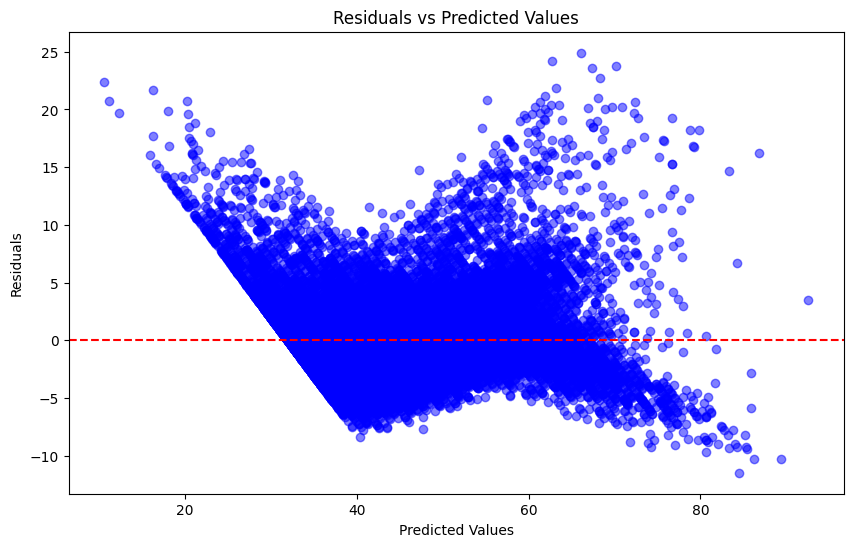

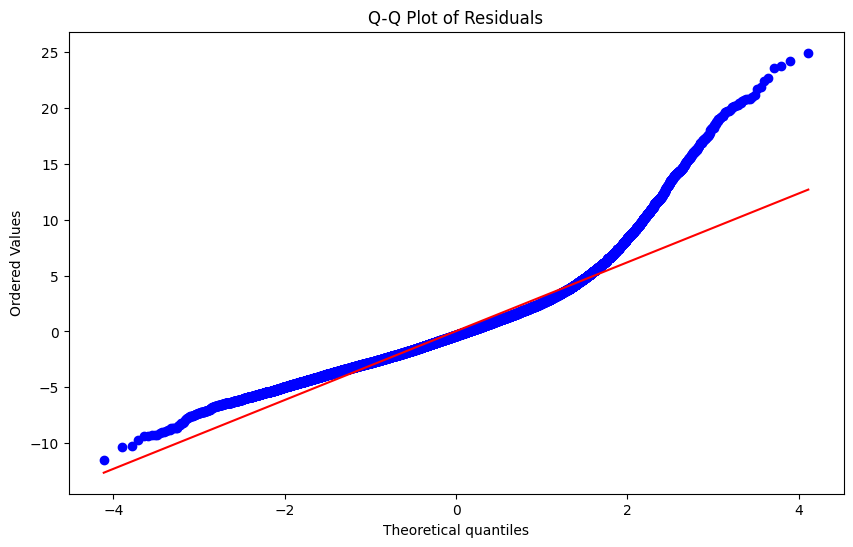

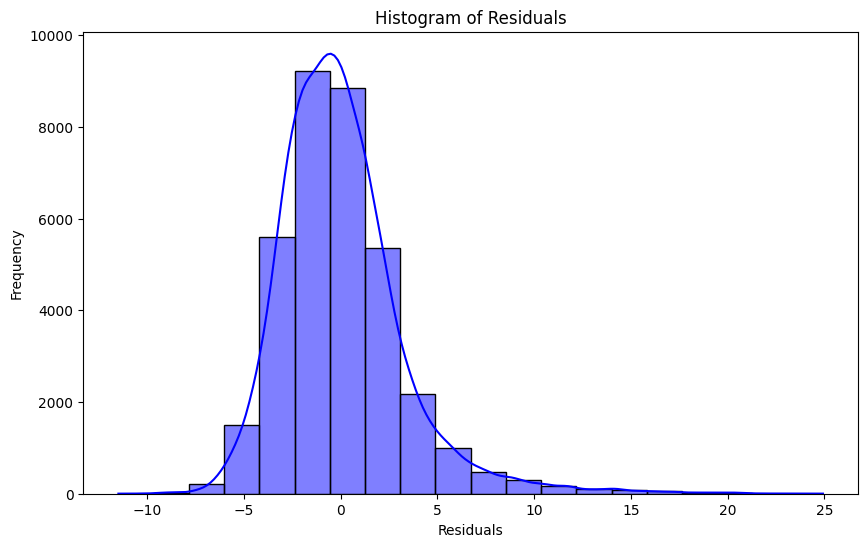

In [65]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
import scipy.stats as stats

y_pred = model.predict(X_test_selected)  # Predicted values
residuals = y_test - y_pred  # Residuals (actual - predicted)

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [69]:
# Compare the scaled vs unscaled features used in the final model

model_unscaled = LinearRegression()
model_unscaled.fit(X_train_selected, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

unscaled_coefficients = model_unscaled.coef_
scaled_coefficients = model_scaled.coef_

print("Unscaled Coefficients:")
print(unscaled_coefficients)

print("\nScaled Coefficients:")
print(scaled_coefficients)

Unscaled Coefficients:
[-8.26140974e-01  5.81266130e-03 -6.79855382e-01 -1.06003206e-01
  2.28263947e+00  9.29454044e-01  1.09263189e-01  3.12183197e-01
 -1.25003133e+01 -4.54160715e+00  1.83058702e+01  4.16760971e+00
 -2.34688647e-01  1.21126206e+00 -8.88178420e-15 -7.28007224e-01
 -4.89449450e-02 -1.71908635e-02  4.23167107e-04  1.02139246e-03]

Scaled Coefficients:
[-8.26140974e-01  1.20395510e-01 -1.02874454e+00 -1.06003206e-01
  2.28263947e+00  9.29454044e-01  1.09263189e-01  3.12183197e-01
 -1.25003133e+01 -4.54160715e+00  1.83058702e+01  4.16760971e+00
 -2.03645498e+00  5.75977130e-01 -4.44089210e-16 -3.47313175e-01
 -4.51265531e-01 -1.44119449e-01  7.32671263e-03  1.76275820e-02]


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [72]:
# Analyze the effect of a unit change in a feature, say 'total_items'

std_total_items = X_train['total_items'].std()

effect_unscaled = unscaled_coefficients[X_train.columns.get_loc('total_items')]

effect_scaled = scaled_coefficients[X_train.columns.get_loc('total_items')] * std_total_items

print("Unscaled Coefficient for 'total_items':", effect_unscaled)
print("Scaled Coefficient for 'total_items':", scaled_coefficients[X_train.columns.get_loc('total_items')])
print("Effect of a 1 unit change in 'total_items' (unscaled):", effect_unscaled)
print("Effect of a 1 unit change in 'total_items' (scaled):", effect_scaled)

Unscaled Coefficient for 'total_items': 2.2826394706262514
Scaled Coefficient for 'total_items': 2.2826394706262523
Effect of a 1 unit change in 'total_items' (unscaled): 2.2826394706262514
Effect of a 1 unit change in 'total_items' (scaled): 6.225062527547837


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

Categorical variables like "market_id" could affect delivery time by showing how delivery times differ across different regions or groups.

##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>

The parameter `test_size = 0.2` means that 20% of the data will be used for testing the model, and the remaining 80% will be used for training the model. 

##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>

The feature with the highest correlation (the number closest to 1 or -1) with the target variable is the one that has the most influence on predicting the target.

##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

Using the IQR (Interquartile Range) Method.

For this analysis, I calculated the IQR for each feature, identified the outliers, and then either removed them or capped the values to reduce their impact on the model.

##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

**total_items** has the highest positive impact, meaning as the number of items increases, the delivery time increases.

**num_distinct_items** also positively affects delivery time, but not as strongly as total_items.

**total_onshift_dashers** has a negative impact, meaning more dashers working could potentially reduce the delivery time.

#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>


Linear regression is a simple and powerful method for predicting values based on data. It helps us understand relationships between variables and make predictions. It works best when the data has a linear relationship and when the assumptions of the model are met.

##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>

Simple Linear Regression: Uses one independent variable to predict the target.

Multiple Linear Regression: Uses multiple independent variables to predict the target, which allows for more complex relationships.

While simple linear regression is good for problems with a single predictor, multiple linear regression is better for problems where several factors influence the outcome.

##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>


In linear regression, the cost function is a measure of how well the model's predictions match the actual target values (the observed data). It tells us how far off our model's predictions are from the true values, and our goal is to minimize this error as much as possible.

The most commonly used cost function in linear regression is the Mean Squared Error (MSE), which is the average of the squared differences between the predicted values and the actual target values.

##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>

Overfitting leads to a model that is too complex and fits the training data too well, making it poor at generalizing to new data.

Underfitting leads to a model that is too simple and fails to capture the true patterns, resulting in poor performance even on the training data.

The key is to find the right balance a model that is complex enough to capture the data's patterns, but simple enough to generalize well to unseen data.

##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>

Residual plots are critical tools for evaluating the assumptions and performance of a linear regression model. By inspecting residuals, we can assess whether the model fits the data well and whether adjustments are needed for issues like non-linearity, heteroscedasticity, outliers, or autocorrelation. They provide insights into how to refine the model for better predictions and reliable inferences.